# ploting summary graph 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
results = {
    "Framework": [
        "TensorFlow", "TensorFlow", "TensorFlow", "TensorFlow",
        "PyTorch", "PyTorch", "PyTorch", "PyTorch"
    ],
    "Model": [
        "MLP", "LSTM", "MLP", "LSTM",
        "MLP", "MLP", "LSTM", "LSTM"
    ],
    "Device": [
        "CPU", "CPU", "GPU", "GPU",
        "CPU", "GPU", "CPU", "GPU"
    ],
    "MAE": [
        0.4218, 0.2269, 0.4218, 0.2269,
        0.2875, 0.2875, 0.0141, 0.0209
    ],
    "RMSE": [
        0.5953, 0.3805, 0.5953, 0.3805,
        0.4510, 0.4510, 0.0238, 0.0338
    ],
    "R2": [
        0.9925, 0.9969, 0.9925, 0.9969,
        0.9957, 0.9957, 0.9947, 0.9892
    ],
    "Training Time (s)": [
        14.59, 22.72, 13.92, 21.33,
        3.62, 9.59, 3.62, 9.73
    ]
}

# Create DataFrame
df = pd.DataFrame(results)
print(df)


    Framework Model Device     MAE    RMSE      R2  Training Time (s)
0  TensorFlow   MLP    CPU  0.4218  0.5953  0.9925              14.59
1  TensorFlow  LSTM    CPU  0.2269  0.3805  0.9969              22.72
2  TensorFlow   MLP    GPU  0.4218  0.5953  0.9925              13.92
3  TensorFlow  LSTM    GPU  0.2269  0.3805  0.9969              21.33
4     PyTorch   MLP    CPU  0.2875  0.4510  0.9957               3.62
5     PyTorch   MLP    GPU  0.2875  0.4510  0.9957               9.59
6     PyTorch  LSTM    CPU  0.0141  0.0238  0.9947               3.62
7     PyTorch  LSTM    GPU  0.0209  0.0338  0.9892               9.73


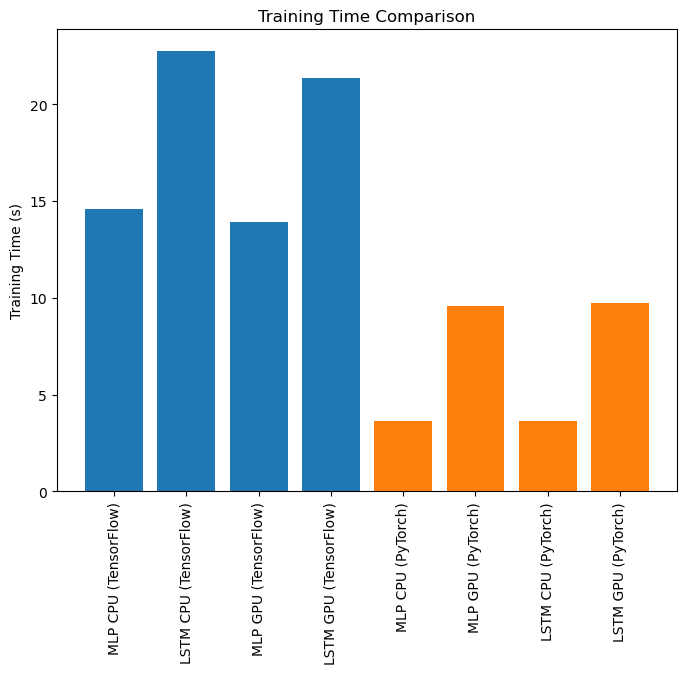

In [9]:
plt.figure(figsize=(8,6))
for fw in df['Framework'].unique():
    subset = df[df['Framework'] == fw]
    plt.bar(subset['Model'] + " " + subset['Device'] + " (" + fw + ")", subset['Training Time (s)'], label=fw)

plt.ylabel("Training Time (s)")
plt.xticks(rotation=90)
plt.title("Training Time Comparison")
plt.show()


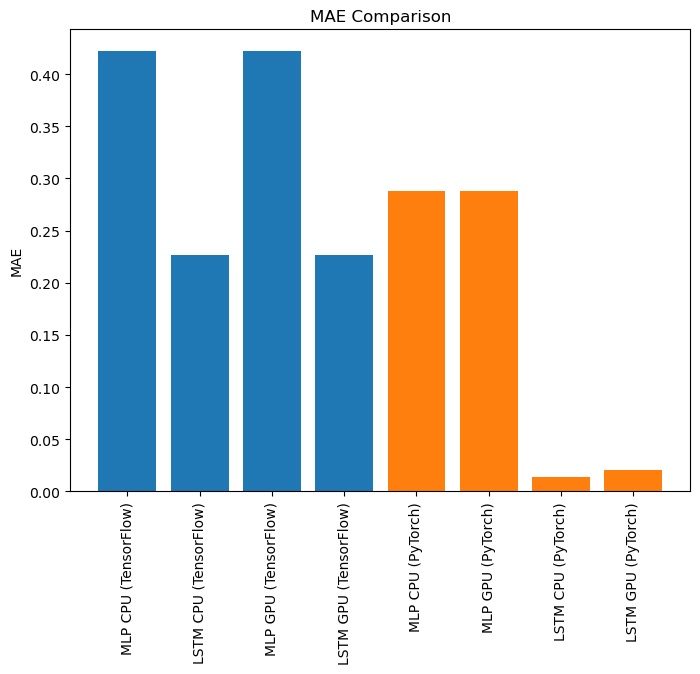

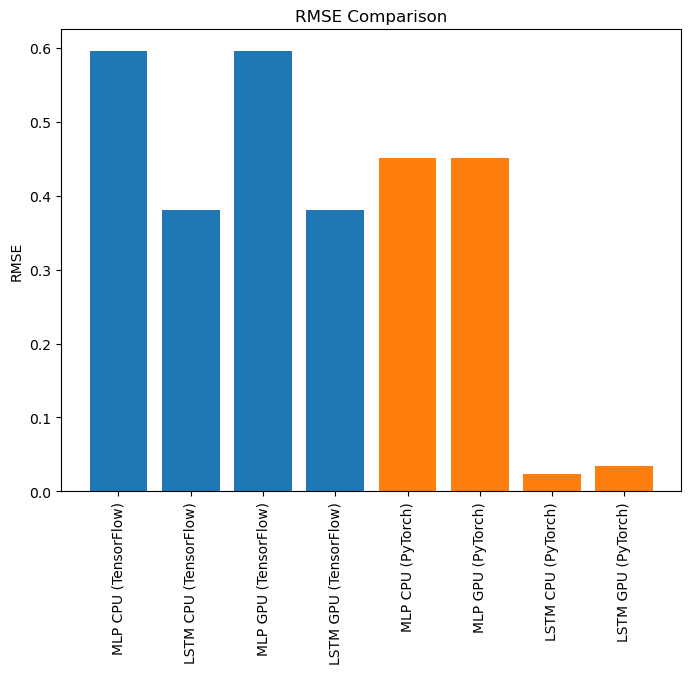

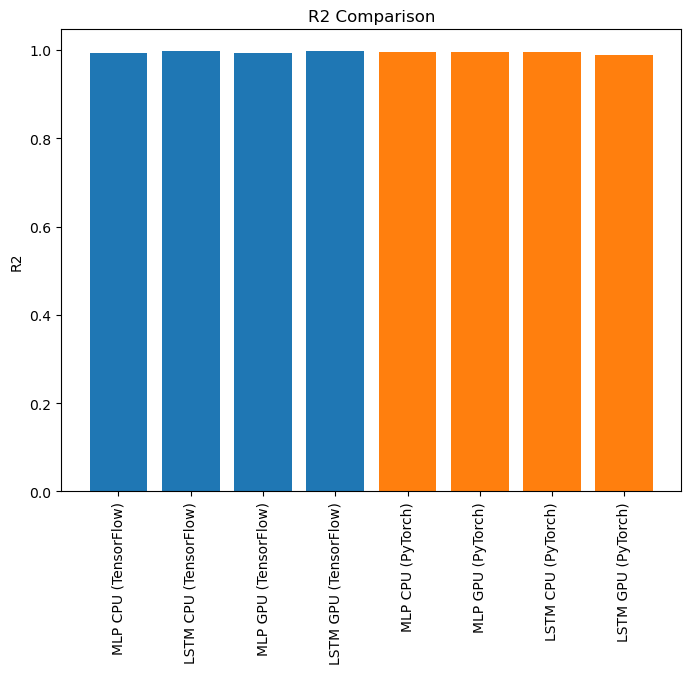

In [10]:
metrics = ["MAE", "RMSE", "R2"]
for metric in metrics:
    plt.figure(figsize=(8,6))
    for fw in df['Framework'].unique():
        subset = df[df['Framework'] == fw]
        plt.bar(subset['Model'] + " " + subset['Device'] + " (" + fw + ")", subset[metric], label=fw)
    
    plt.ylabel(metric)
    plt.xticks(rotation=90)
    plt.title(f"{metric} Comparison")
    plt.show()


In [6]:
df

,Framework,Model,Device,MAE,RMSE,R2,Training Time (s)
0,TensorFlow,MLP,CPU,0.4218,0.5953,0.9925,14.59
1,TensorFlow,LSTM,CPU,0.2269,0.3805,0.9969,22.72
2,TensorFlow,MLP,GPU,0.4218,0.5953,0.9925,13.92
3,TensorFlow,LSTM,GPU,0.2269,0.3805,0.9969,21.33
4,PyTorch,MLP,CPU,0.2875,0.4510,0.9957,3.62
5,PyTorch,MLP,GPU,0.2875,0.4510,0.9957,9.59
6,PyTorch,LSTM,CPU,0.0141,0.0238,0.9947,3.62
7,PyTorch,LSTM,GPU,0.0209,0.0338,0.9892,9.73


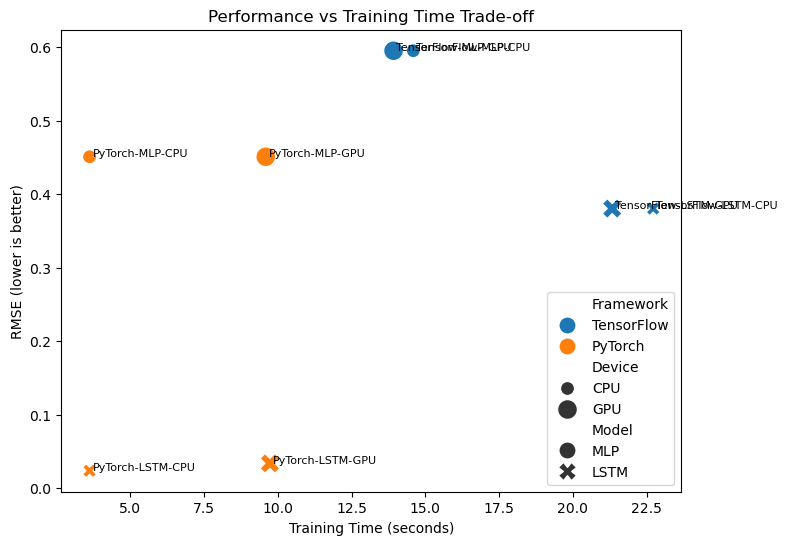

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Training Time (s)", y="RMSE", 
                hue="Framework", style="Model", size="Device", 
                sizes={"CPU": 100, "GPU": 200}, s=150)

for i, row in df.iterrows():
    plt.text(row["Training Time (s)"]+0.1, row["RMSE"], f"{row['Framework']}-{row['Model']}-{row['Device']}", fontsize=8)

plt.title("Performance vs Training Time Trade-off")
plt.xlabel("Training Time (seconds)")
plt.ylabel("RMSE (lower is better)")
plt.legend()
plt.show()

In [12]:
metrics = ["MAE", "RMSE", "R2", "Training Time (s)"]
df_norm = df.copy()
for col in ["MAE", "RMSE", "Training Time (s)"]:
    df_norm[col] = (df[col].max() - df[col]) / (df[col].max() - df[col].min())  # lower=better
df_norm["R2"] = (df["R2"] - df["R2"].min()) / (df["R2"].max() - df["R2"].min())  # higher=better

# Melt for radar
df_melt = df_norm.melt(id_vars=["Framework","Model","Device"], 
                       value_vars=metrics, 
                       var_name="Metric", value_name="Score")
fig = px.line_polar(df_melt, 
                    r="Score", theta="Metric", 
                    color="Framework", 
                    line_close=True,
                    symbol="Model",
                    line_dash="Device",
                    title="Radar Chart: Multi-Metric Comparison")
fig.show()

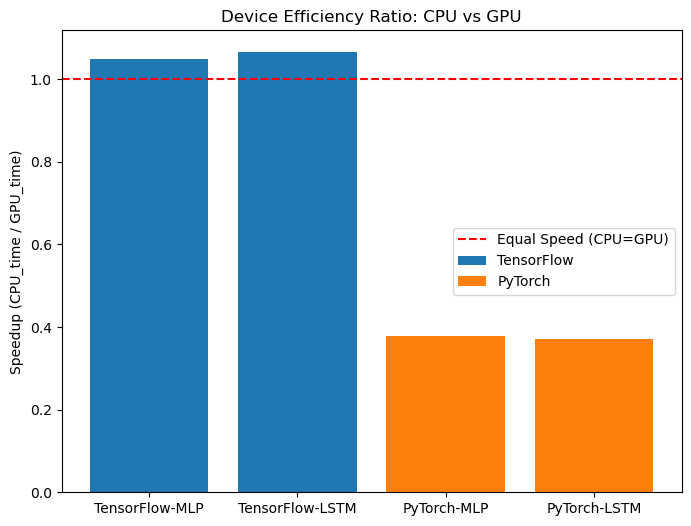

In [ ]:
cpu_times = df[df["Device"]=="CPU"].set_index(["Framework","Model"])["Training Time (s)"]
gpu_times = df[df["Device"]=="GPU"].set_index(["Framework","Model"])["Training Time (s)"]

# Compute Speedup ratio
speedup = (cpu_times / gpu_times).reset_index()
speedup.columns = ["Framework","Model","Speedup"]

# --- Plot ---
plt.figure(figsize=(8,6))
for fw in speedup["Framework"].unique():
    subset = speedup[speedup["Framework"]==fw]
    plt.bar([f"{fw}-{m}" for m in subset["Model"]], subset["Speedup"], label=fw)

plt.axhline(1, color="red", linestyle="--", label="Equal Speed (CPU=GPU)")
plt.ylabel("Speedup (CPU_time / GPU_time)")
plt.title("Device Efficiency Ratio: CPU vs GPU")
plt.legend()
plt.show()

In [ ]:
from PIL import Image
import os
folder_name = ['plots/forecasting','plots/regression','plots/training_time_resources','plots/learning_curve']
# Folder containing all 8 plots

for fol in folder_name :
    folder = f"../{fol}"   # change to your folder path
    images = [Image.open(os.path.join(folder, f)) for f in sorted(os.listdir(folder)) if f.endswith(".png")]

    # Ensure all images are same size (resize if needed)
    scale = 4
    width, height = images[0].size
    width, height = width * scale, height * scale
    images = [img.resize((width, height),Image.LANCZOS) for img in images]

    # Arrange in 2 rows × 4 columns
    cols, rows = 2,4
    collage = Image.new("RGB", (cols * width, rows * height), color="white")

    for idx, img in enumerate(images):
        x = (idx % cols) * width
        y = (idx // cols) * height
        collage.paste(img, (x, y))

    # Save final collage
    collage.save(f"../plots/{folder}.png",dpi =(300,300))
    collage.show()
